In [1]:
import os
import pickle
import glob
import skimage
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def compile_data_to_array(data_dir, sample_start=8000, sample_end=10000):
    fnames = list(sorted(glob.glob(os.path.join(data_dir, "*.pkl"))))
    
    print('Found %s records' % len(fnames))
    # Load into a list of tuples of xmin, xmax, y, data
    data = []
    XMIN = None
    XMAX = None
    for fname in fnames:
        with open(fname, 'rb') as f:
            fft_data = pickle.load(f)

        # Isolate the frequency. In our case, 28kHz is usually around sample 8000 to 10000
        amplitudes = fft_data[:, sample_start:sample_end].max(axis=1)

        name = os.path.basename(fname).replace('.pkl', '').replace('continuous_', '')
        coords = [float(coord) for coord in name.split('_')]
        xmin, xmax, y = coords
        XMIN = xmin
        XMAX = xmax
        data.append((xmin, xmax, y, amplitudes))
        
    # Sort by y coordinate (xmin and xmax are expected to be the same for all)
    data = list(sorted(data))
    if not data:
        raise RuntimeError('No Data Found')
        
    # Just get the amplitudes and stack them on each other to form an image
    ampdata = [d[-1] for d in data]

    # Get the minimum size of any of these, so we can interpolate to a fixed array length
    target_size = np.median(np.array([len(x) for x in ampdata]))
    print('Median number of records in continguous strip: %s' % str(target_size))
    resized_ampdata = [np.interp(np.linspace(XMIN, XMAX, target_size),
                                 np.linspace(XMIN, XMAX, len(d)), d)
                       for d in ampdata]
    resized_ampdata = np.array(resized_ampdata)

    return resized_ampdata

Found 184 records
Median number of records in continguous strip: 214.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


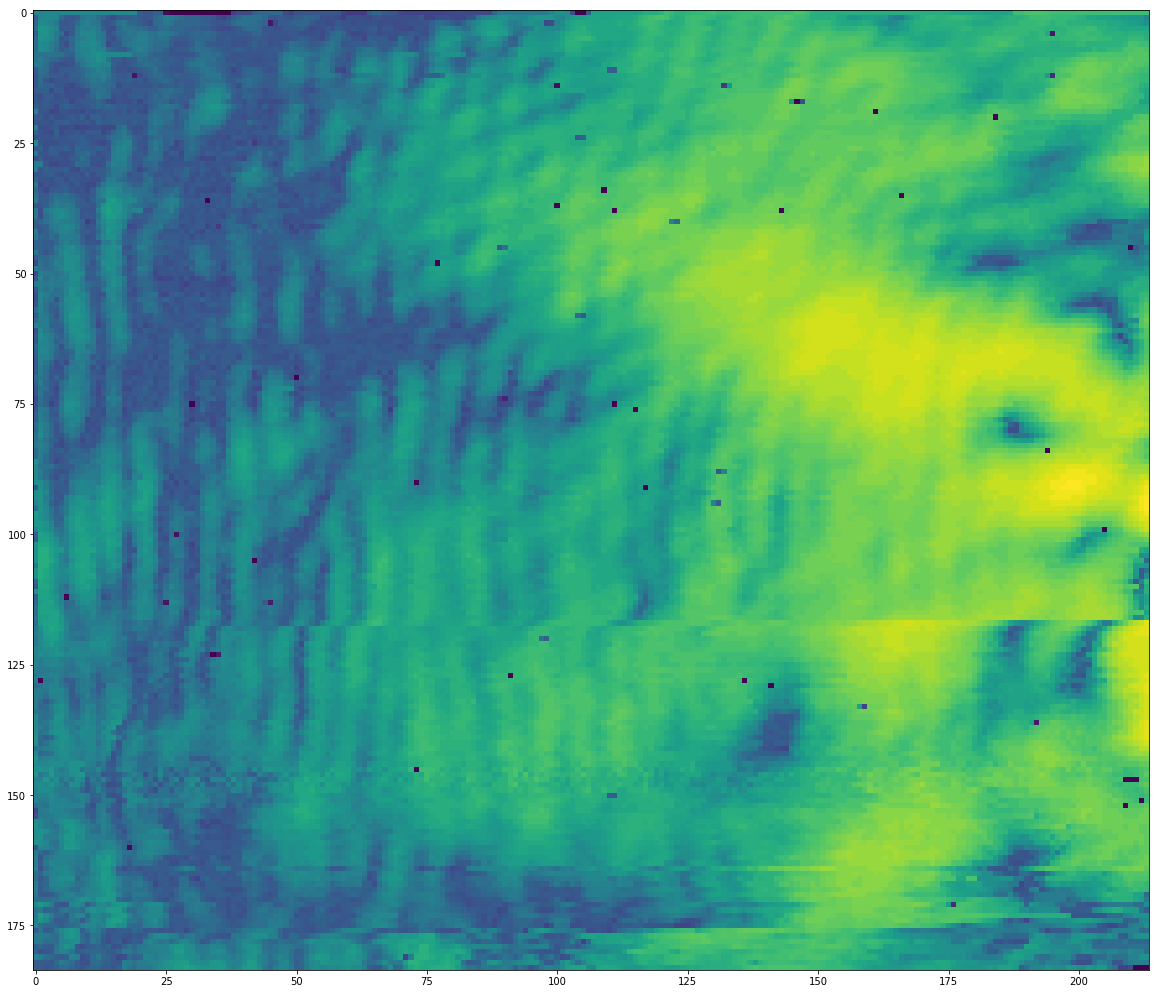

In [54]:
ampdata = compile_data_to_array("../data/1550174702")

# Plot this as an image
plt.figure(figsize=(20, 20))
plt.imshow(ampdata)
plt.show()

In [55]:
# This scan took 44590 seconds
ampdata = compile_data_to_array("../data/1550198506")

Found 241 records
Median number of records in continguous strip: 322.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


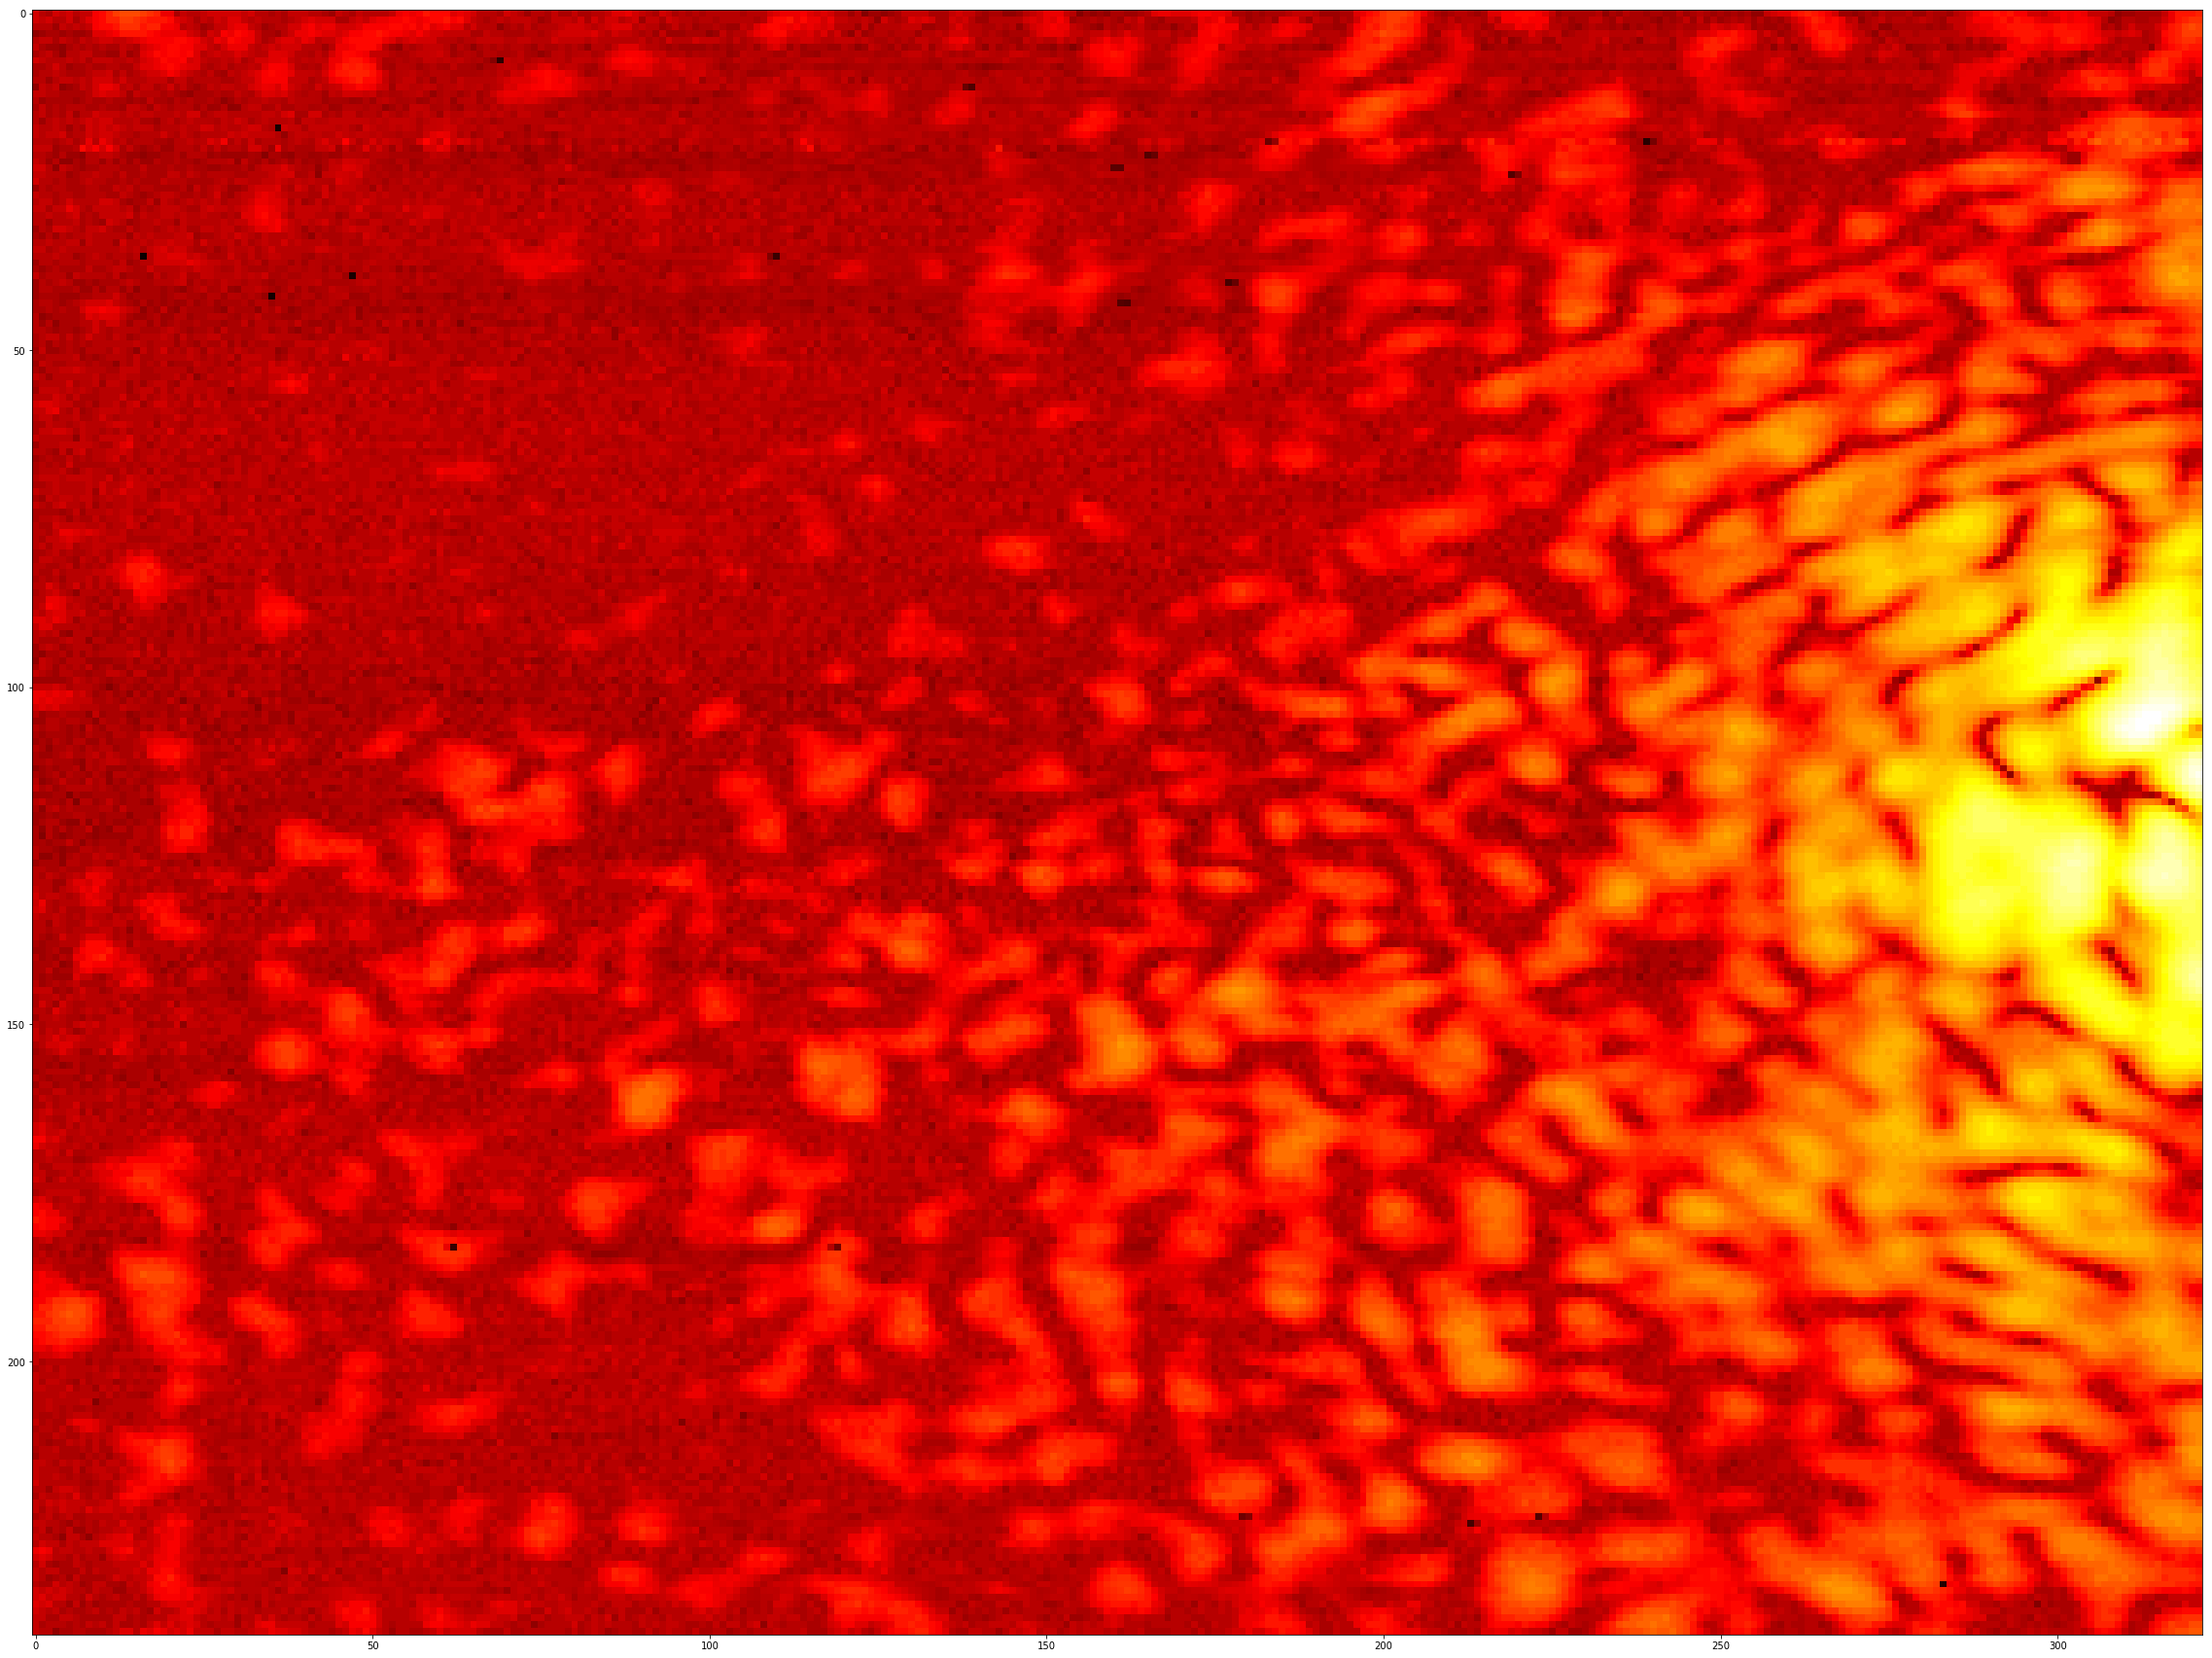

In [56]:
# Postprocess to get rid of the missed records...
h, w = ampdata.shape
for i in range(h):
    for j in range(w):
        if ampdata[i, j] == -1:
            neighbors = [(i+di, j+dj) for di in [-1, 1] for dj in [-1, 1]]
            neighbors = list(filter(lambda x: 0 <= x[0] < h, neighbors))
            neighbors = list(filter(lambda x: 0 <= x[1] < w, neighbors))
            # Don't average over bad results nearby either
            neighbors = list(filter(lambda x: ampdata[x] != -1, neighbors))
            # print(neighbors)
            ampdata[i, j] = sum([ampdata[n] for n in neighbors]) / len(neighbors)

# Plot this as an image
plt.figure(figsize=(40, 40))
plt.imshow(ampdata, cmap='hot')
plt.show()

In [57]:
(ampdata == 0).any()

False

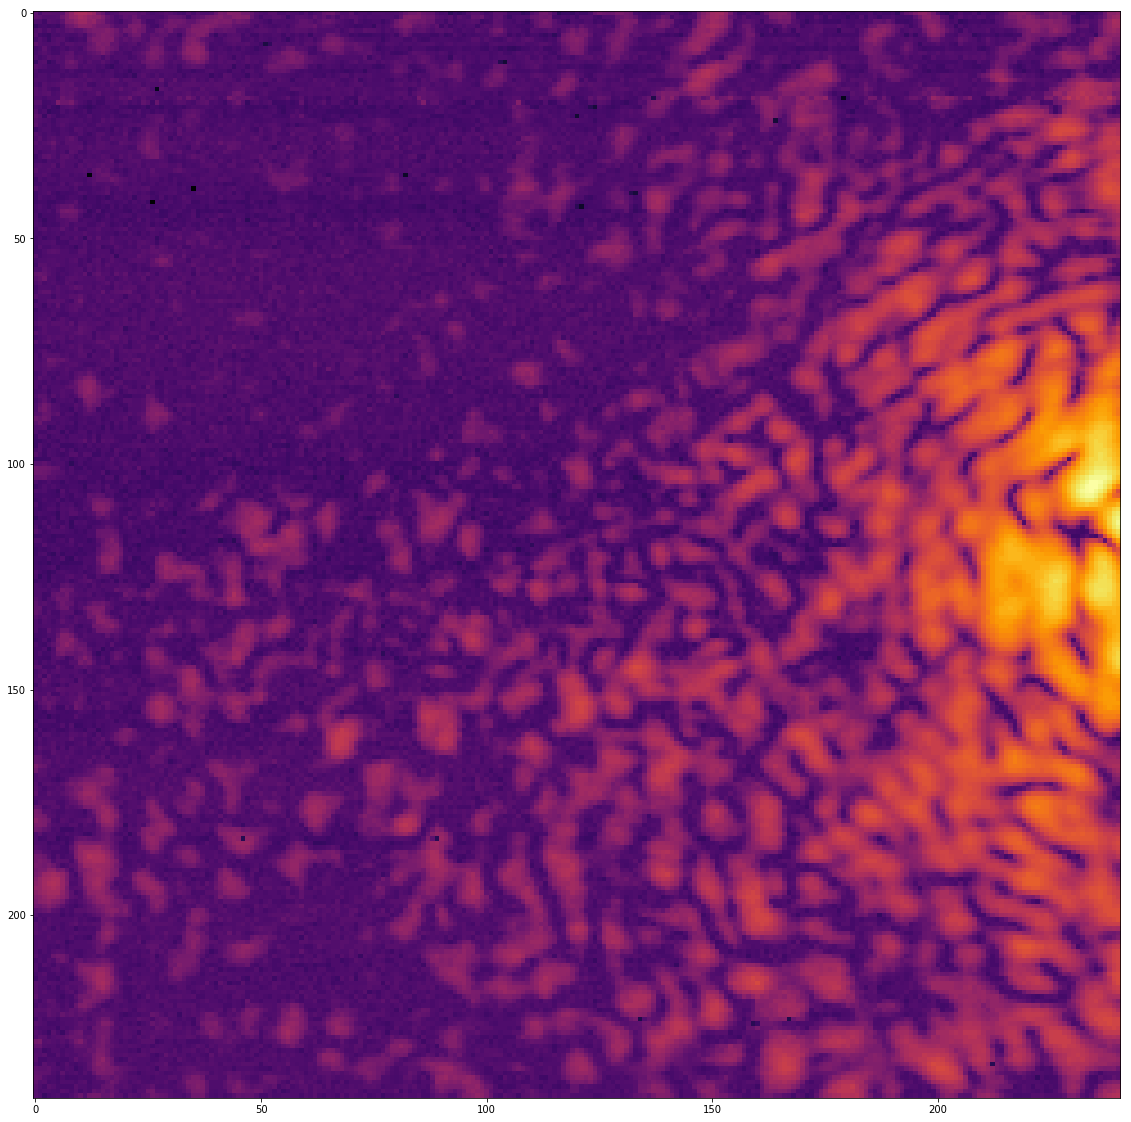

In [58]:
# Plot this as an image
plt.figure(figsize=(20, 20))
plt.imshow(skimage.transform.resize(ampdata, (241, 241)), cmap='inferno')
plt.show()

In [59]:
# This scan took 32310 seconds
ampdata = compile_data_to_array("../data/1550274890")

Found 221 records
Median number of records in continguous strip: 252.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


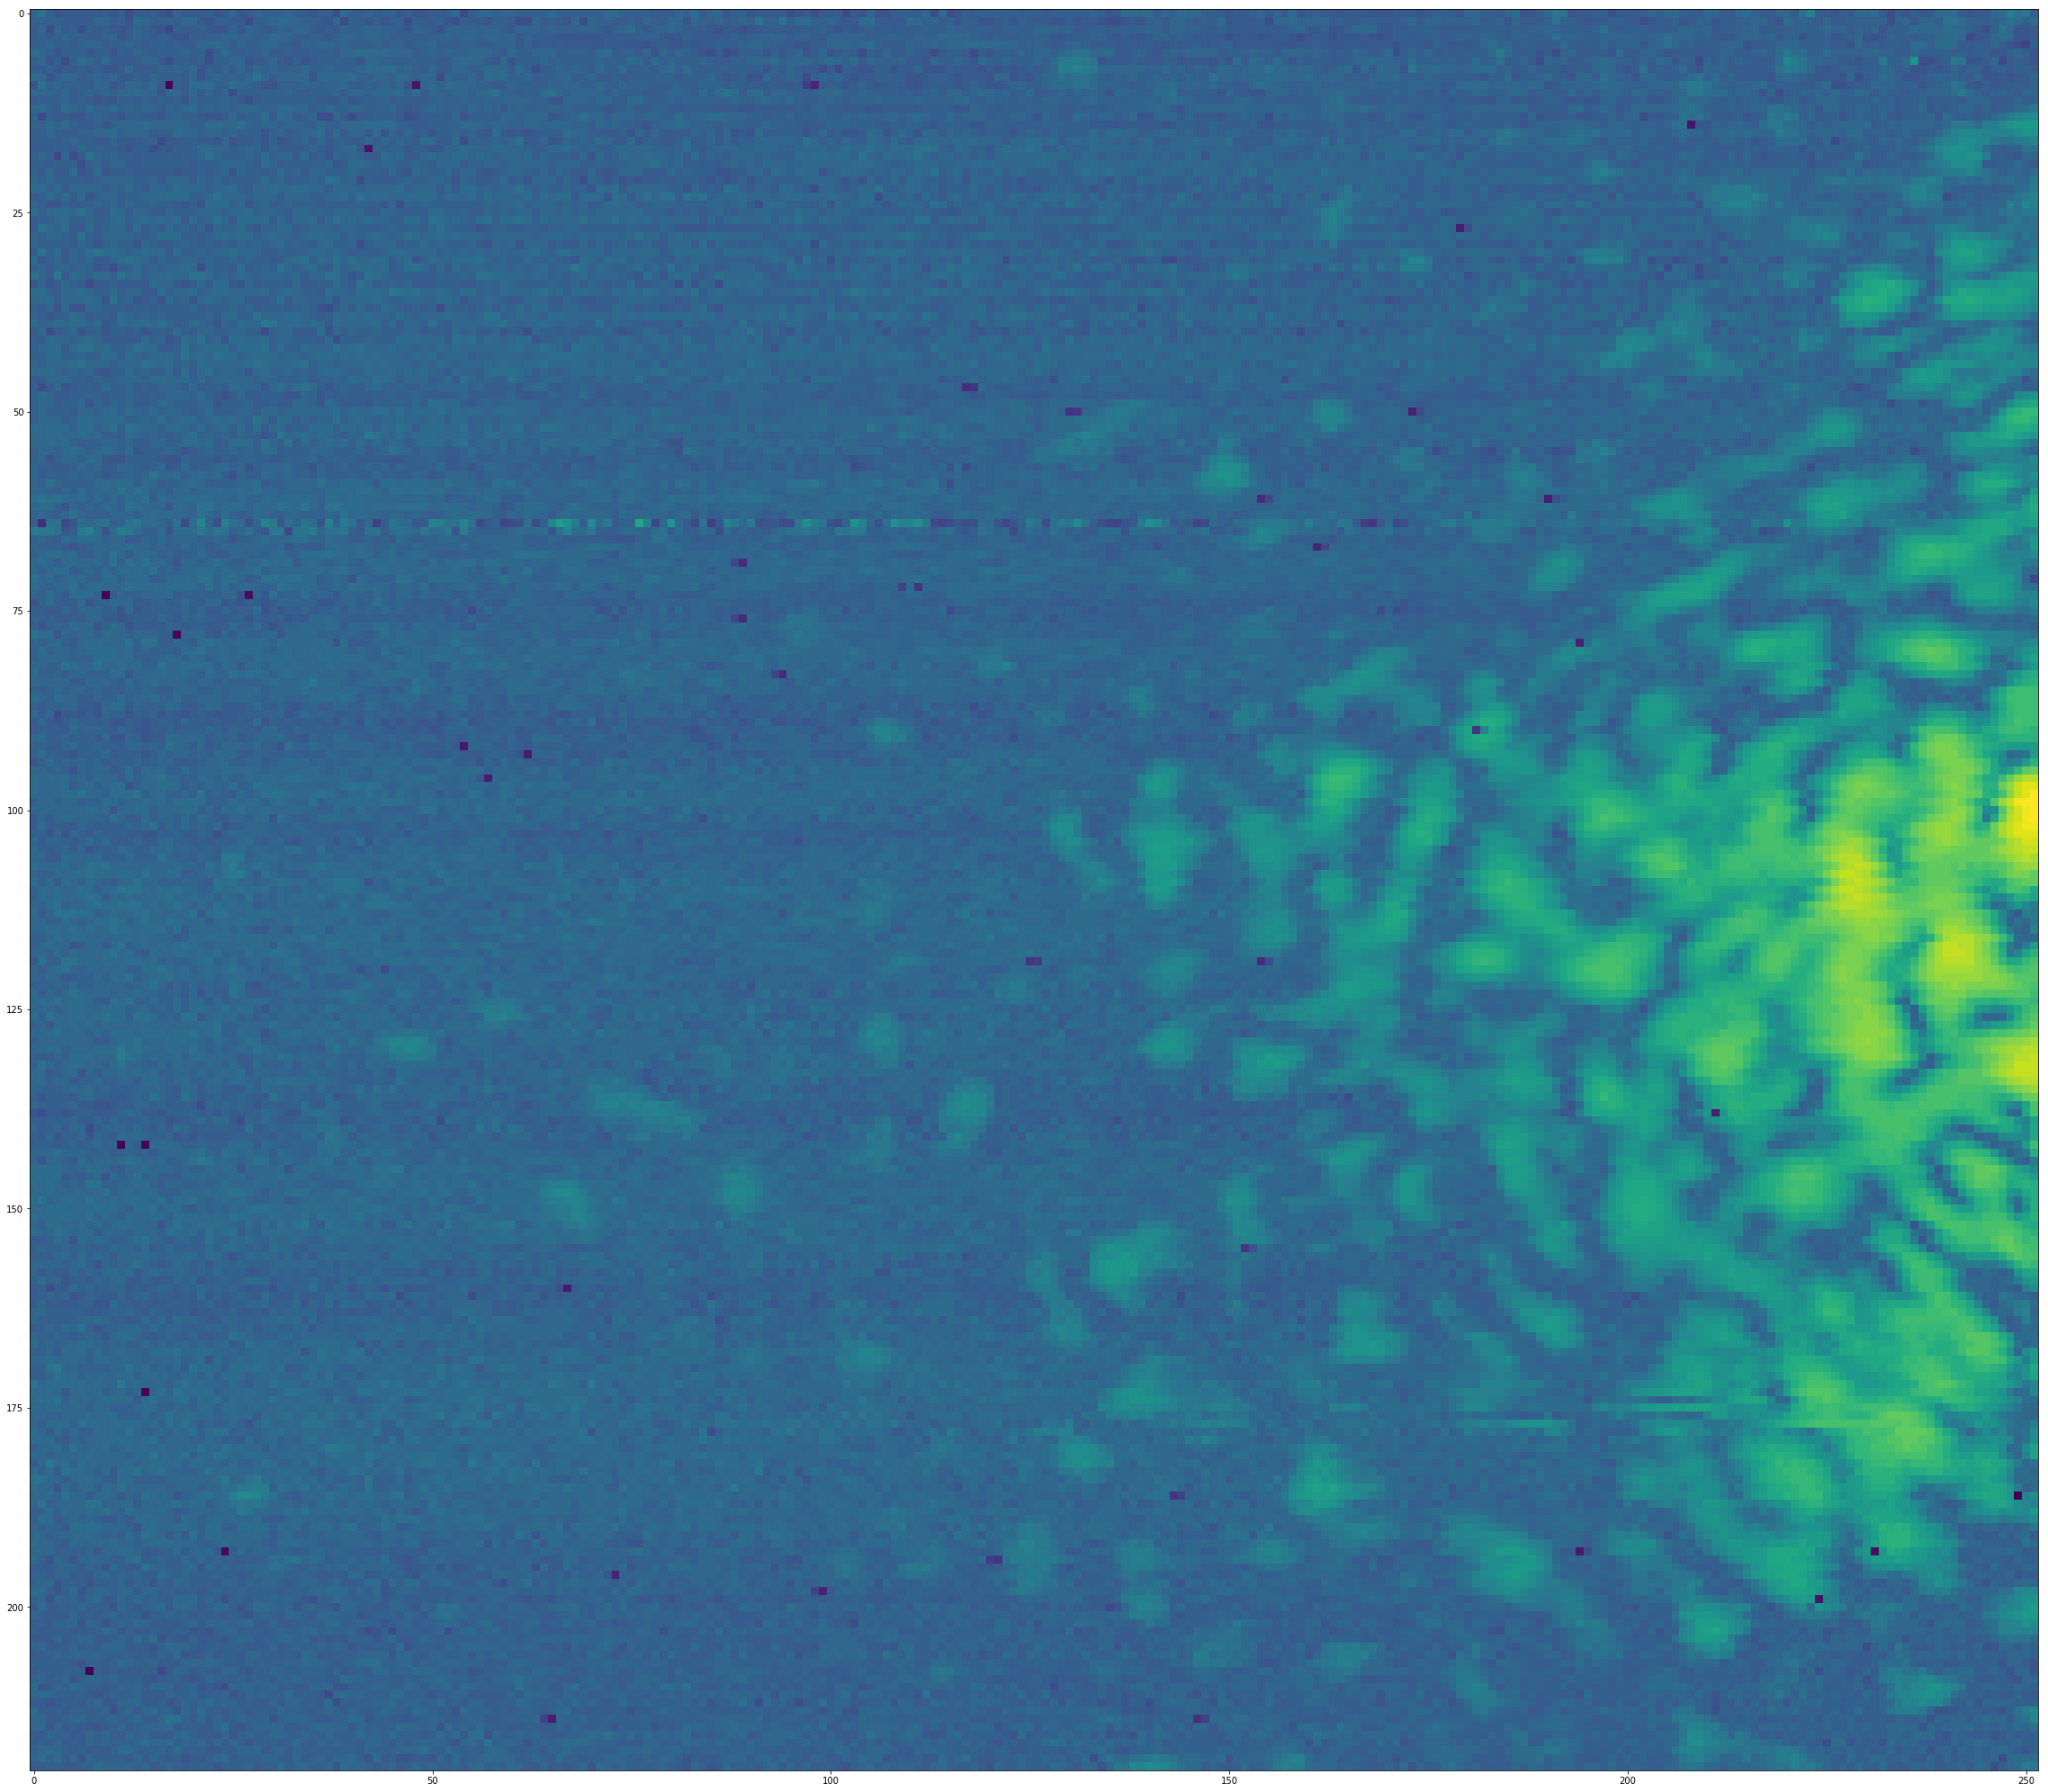

In [60]:
# Postprocess to get rid of the missed records...
h, w = ampdata.shape
for i in range(h):
    for j in range(w):
        if ampdata[i, j] == -1:
            neighbors = [(i+di, j+dj) for di in [-1, 1] for dj in [-1, 1]]
            neighbors = list(filter(lambda x: 0 <= x[0] < h, neighbors))
            neighbors = list(filter(lambda x: 0 <= x[1] < w, neighbors))
            # Don't average over bad results nearby either
            neighbors = list(filter(lambda x: ampdata[x] != -1, neighbors))
            # print(neighbors)
            ampdata[i, j] = sum([ampdata[n] for n in neighbors]) / len(neighbors)

# Plot this as an image
plt.figure(figsize=(40, 40))
plt.imshow(ampdata)
plt.show()

In [101]:
# This scan took 32310 seconds
ampdata = compile_data_to_array("../data/1550362051", sample_start=5500, sample_end=5700)

Found 221 records
Median number of records in continguous strip: 143.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


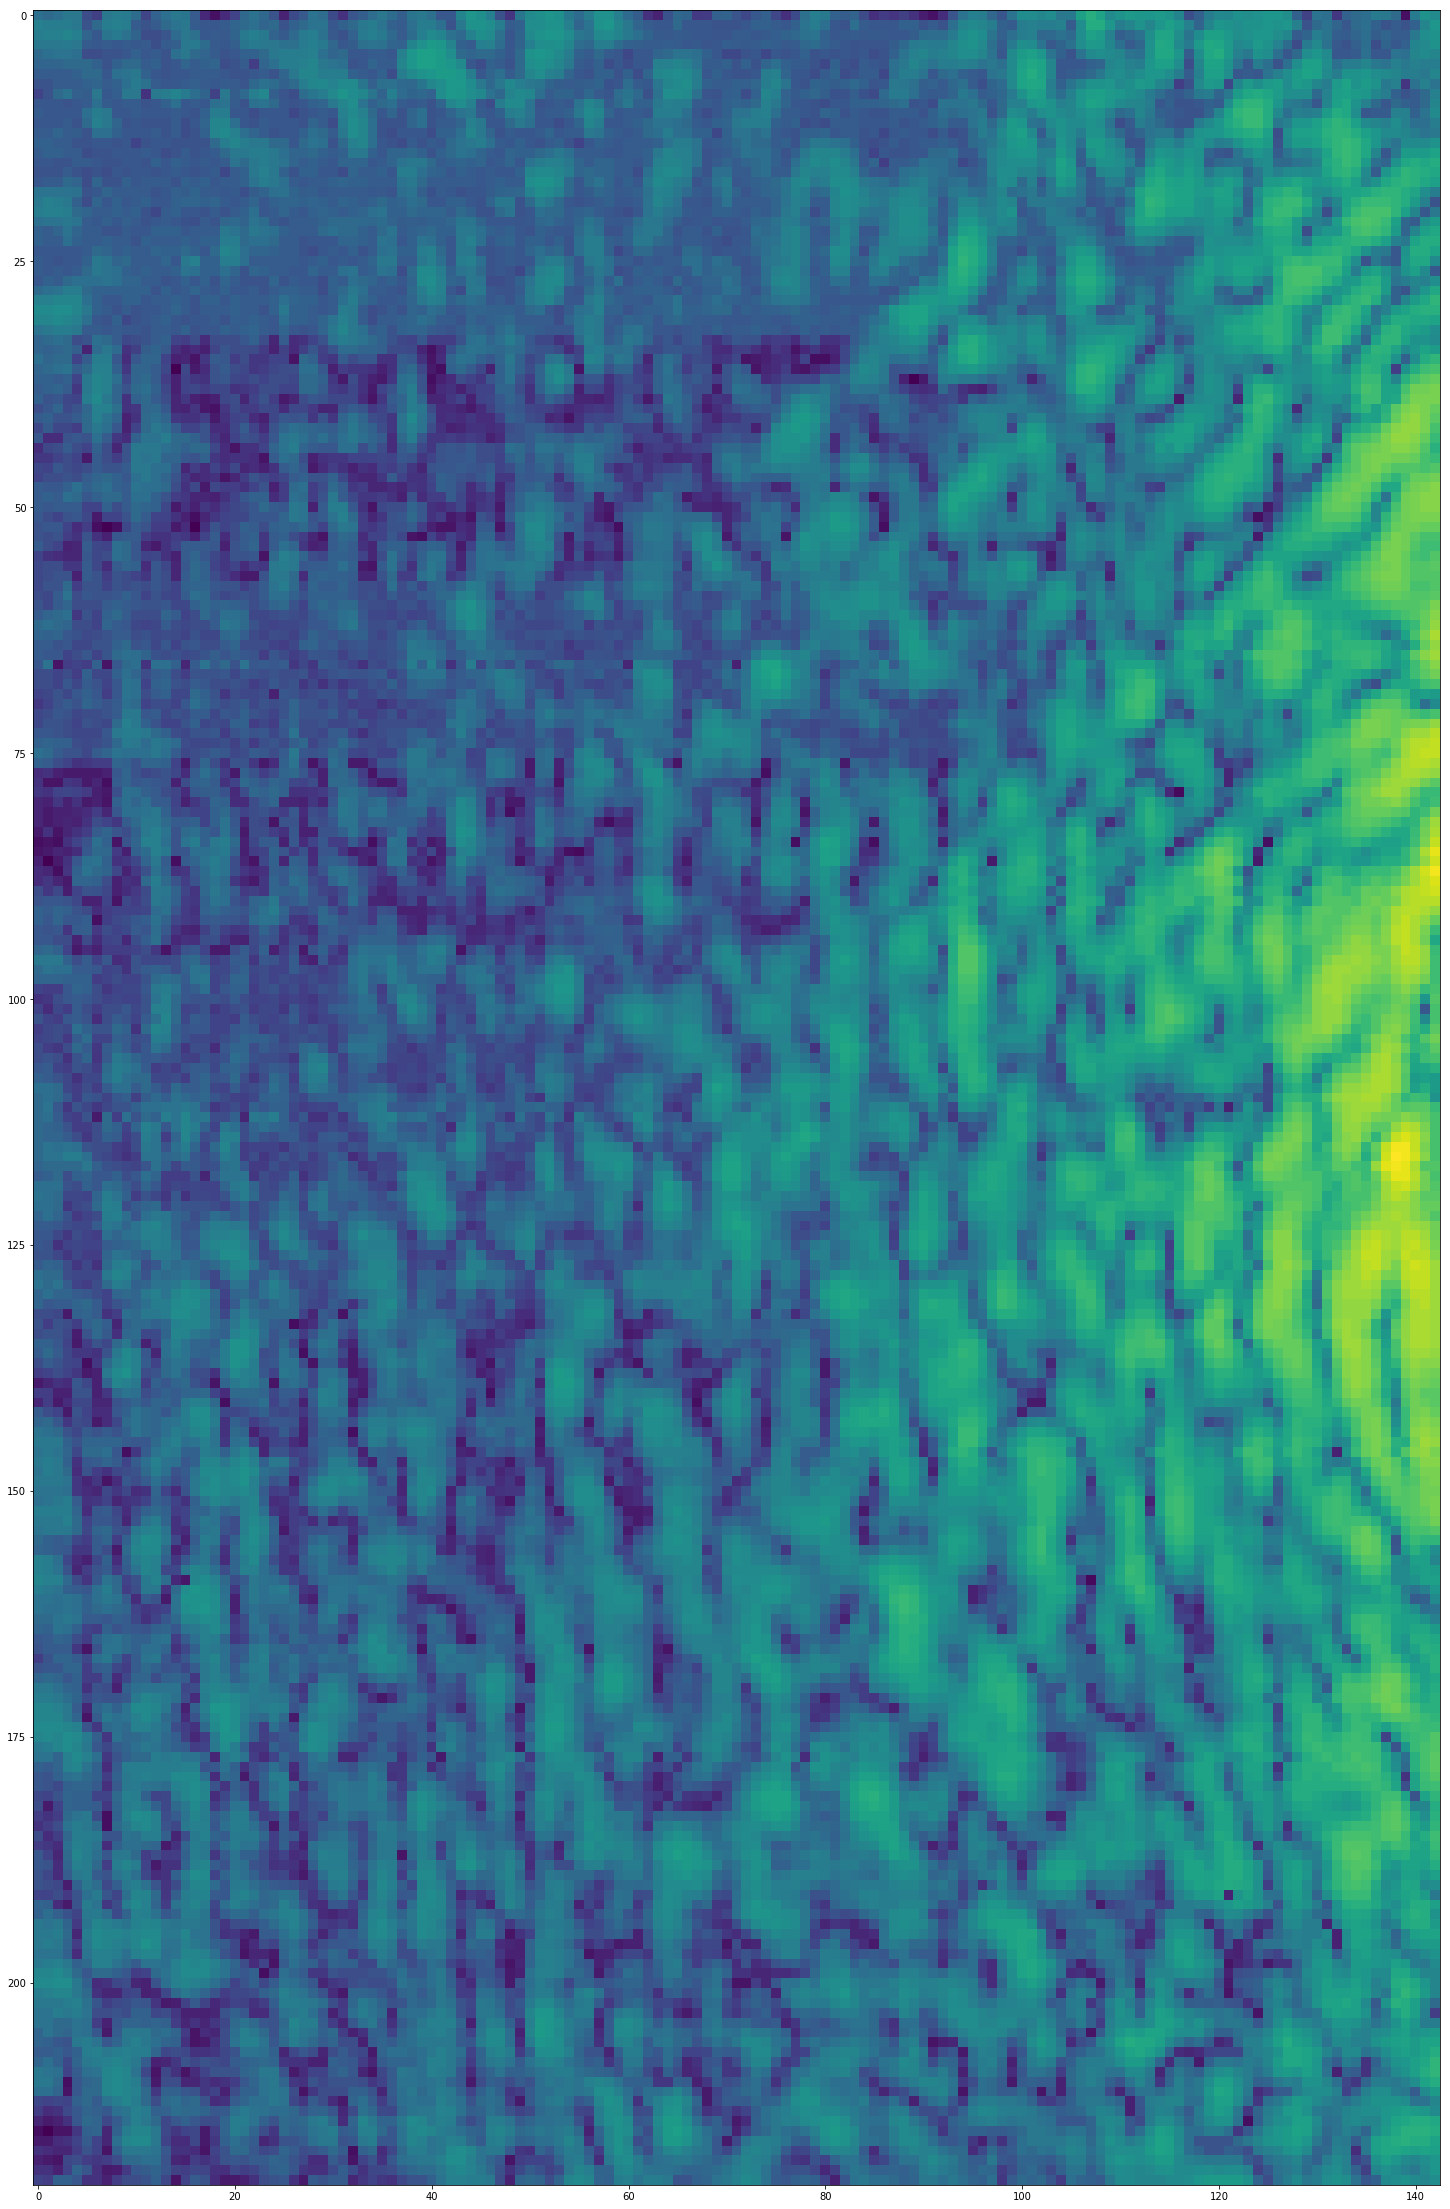

In [102]:
h, w = ampdata.shape
for i in range(h):
    for j in range(w):
        if ampdata[i, j] == -1:
            neighbors = [(i+di, j+dj) for di in [-1, 1] for dj in [-1, 1]]
            neighbors = list(filter(lambda x: 0 <= x[0] < h, neighbors))
            neighbors = list(filter(lambda x: 0 <= x[1] < w, neighbors))
            # Don't average over bad results nearby either
            neighbors = list(filter(lambda x: ampdata[x] != -1, neighbors))
            # print(neighbors)
            ampdata[i, j] = sum([ampdata[n] for n in neighbors]) / len(neighbors)

# Plot this as an image
plt.figure(figsize=(40, 40))
plt.imshow(ampdata)
plt.show()

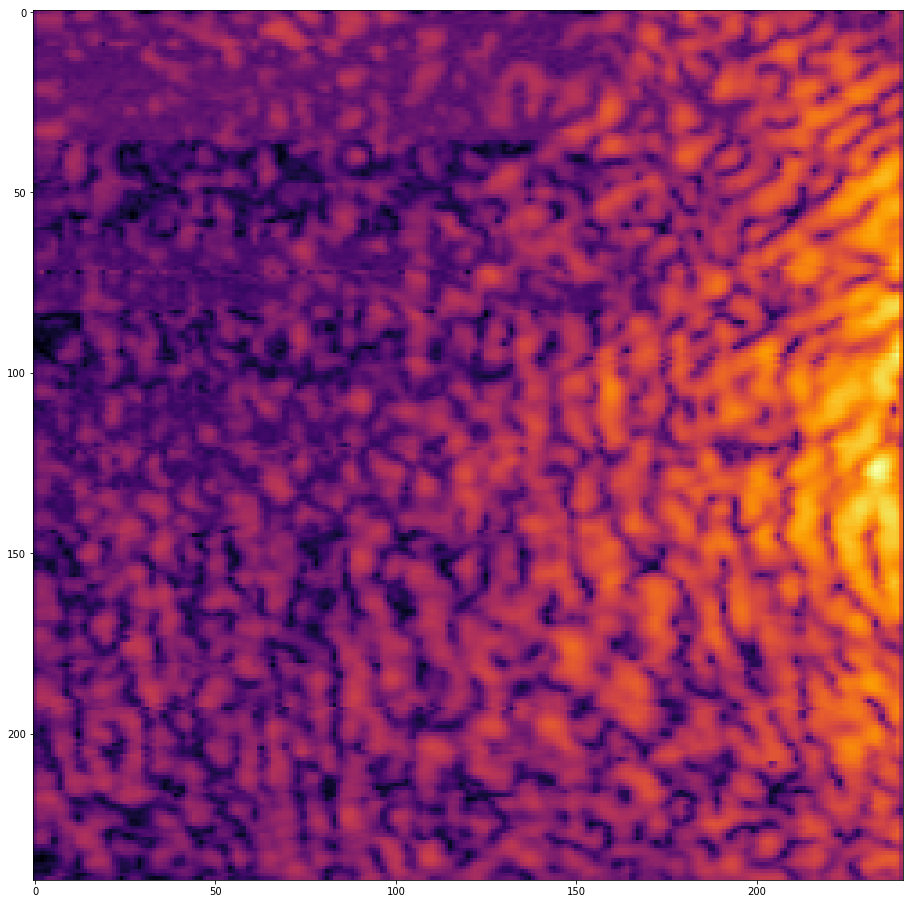

In [104]:
# Plot this as an image
plt.figure(figsize=(16, 16))
plt.imshow(skimage.transform.resize(ampdata, (241, 241)), cmap='inferno')
plt.show()

In [78]:
def get_raw_continuous_scan_data(data_dir, sample_start=0, sample_end=10000):
    fnames = list(sorted(glob.glob(os.path.join(data_dir, "*.pkl"))))
    
    print('Found %s records' % len(fnames))
    # Load into a list of tuples of xmin, xmax, y, data
    data = []
    XMIN = None
    XMAX = None
    for fname in fnames:
        with open(fname, 'rb') as f:
            fft_data = pickle.load(f)

        # Isolate the frequency. In our case, 28kHz is usually around sample 8000 to 10000
        amplitudes = fft_data[:, sample_start:sample_end]
        name = os.path.basename(fname).replace('.pkl', '').replace('continuous_', '')
        coords = [float(coord) for coord in name.split('_')]
        xmin, xmax, y = coords
        XMIN = xmin
        XMAX = xmax
        data.append((xmin, xmax, y, amplitudes))
        
    # Sort by y coordinate (xmin and xmax are expected to be the same for all)
    data = list(sorted(data))
    if not data:
        raise RuntimeError('No Data Found')
        
    # Just get the amplitudes and stack them on each other to form an image
    ampdata = [d[-1] for d in data]
    return ampdata

In [79]:
ampdata = sca("../data/1550362051")

Found 221 records


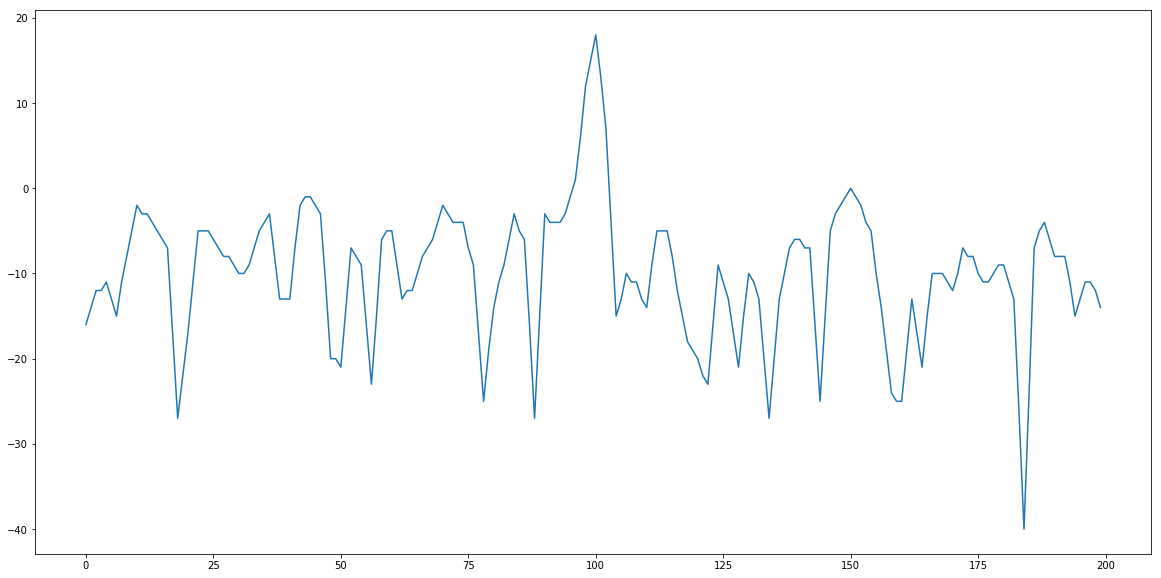

In [106]:
ampdata = compile_data_to_array('../data/1550416809', sample_start=0, sample_end=200)

Found 111 records
Median number of records in continguous strip: 62.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


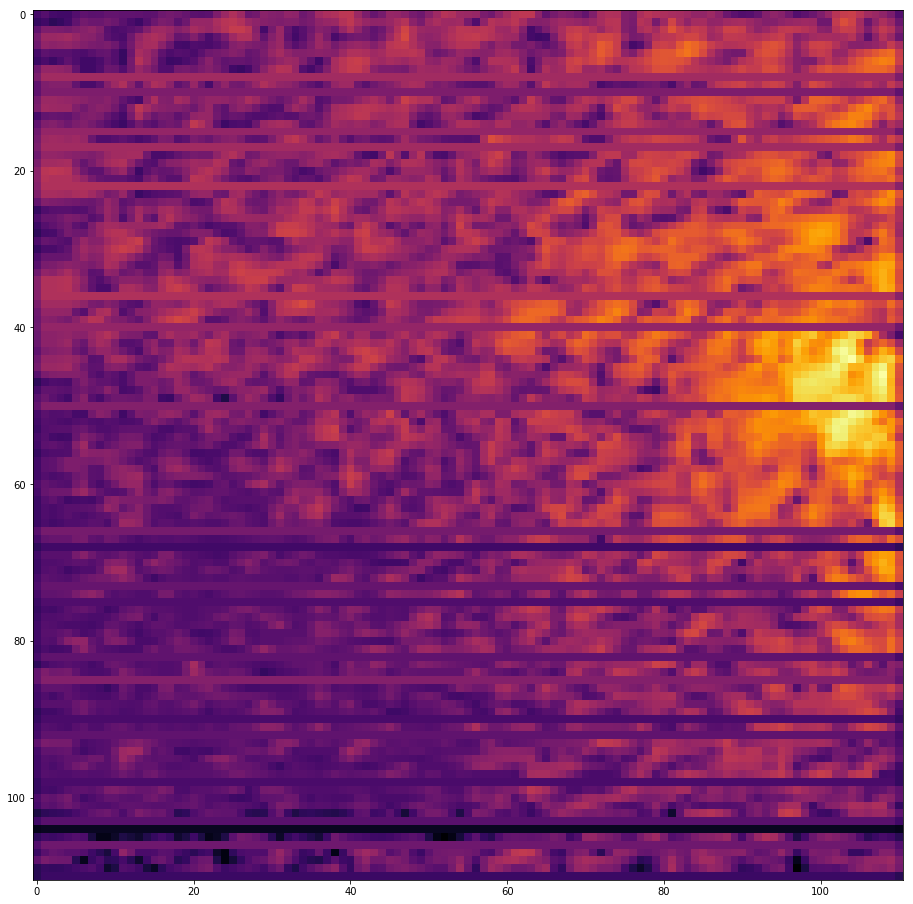

In [111]:
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (111, 111)), cmap='inferno')
plt.show()

In [112]:
ampdata = compile_data_to_array('../data/1550420376', sample_start=0, sample_end=200)

Found 111 records
Median number of records in continguous strip: 123.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


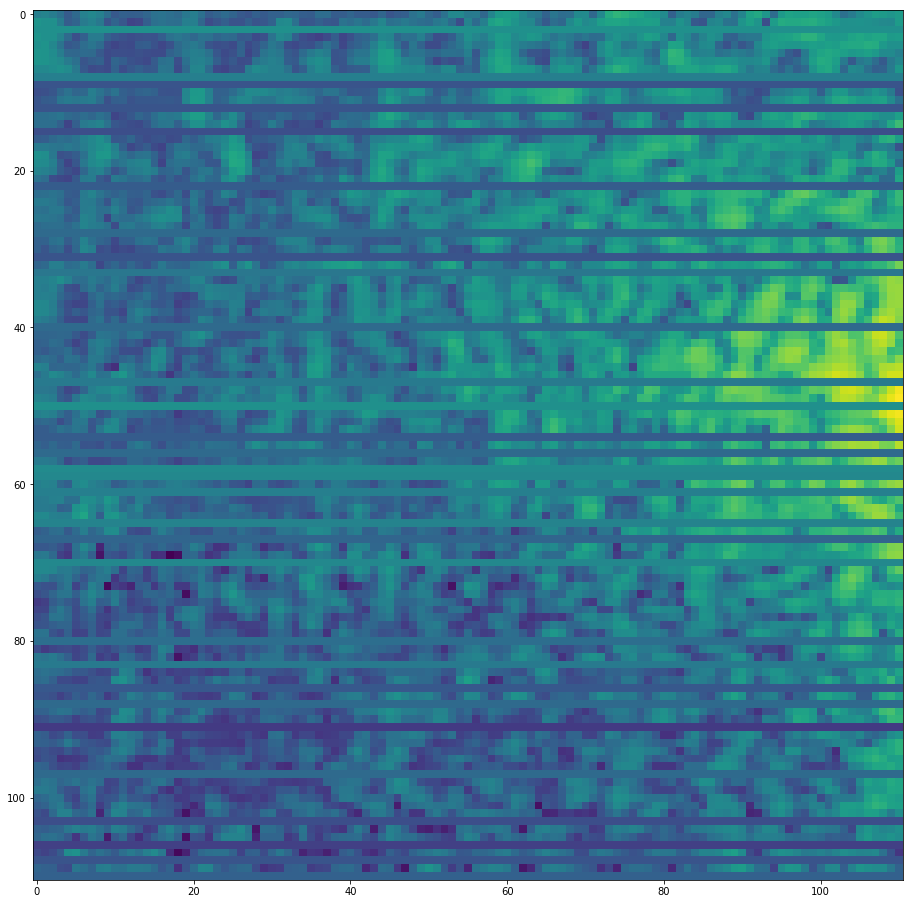

In [114]:
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (111, 111)), cmap='viridis')
plt.show()

In [115]:
ampdata = compile_data_to_array('../data/1550450550', sample_start=0, sample_end=200)

Found 221 records
Median number of records in continguous strip: 732.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


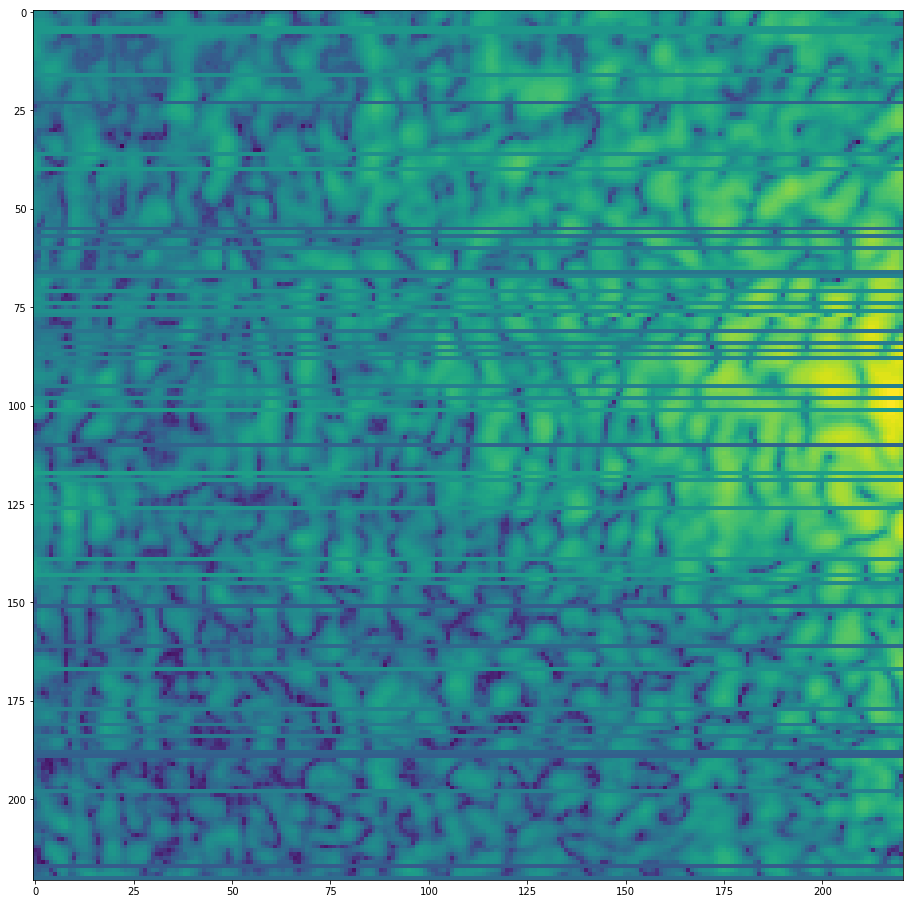

In [116]:
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (221, 221)), cmap='viridis')
plt.show()

In [3]:
ampdata = compile_data_to_array('../data/1550511227', sample_start=0, sample_end=200)

Found 221 records
Median number of records in continguous strip: 498.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


/home/metamaterials/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/metamaterials/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


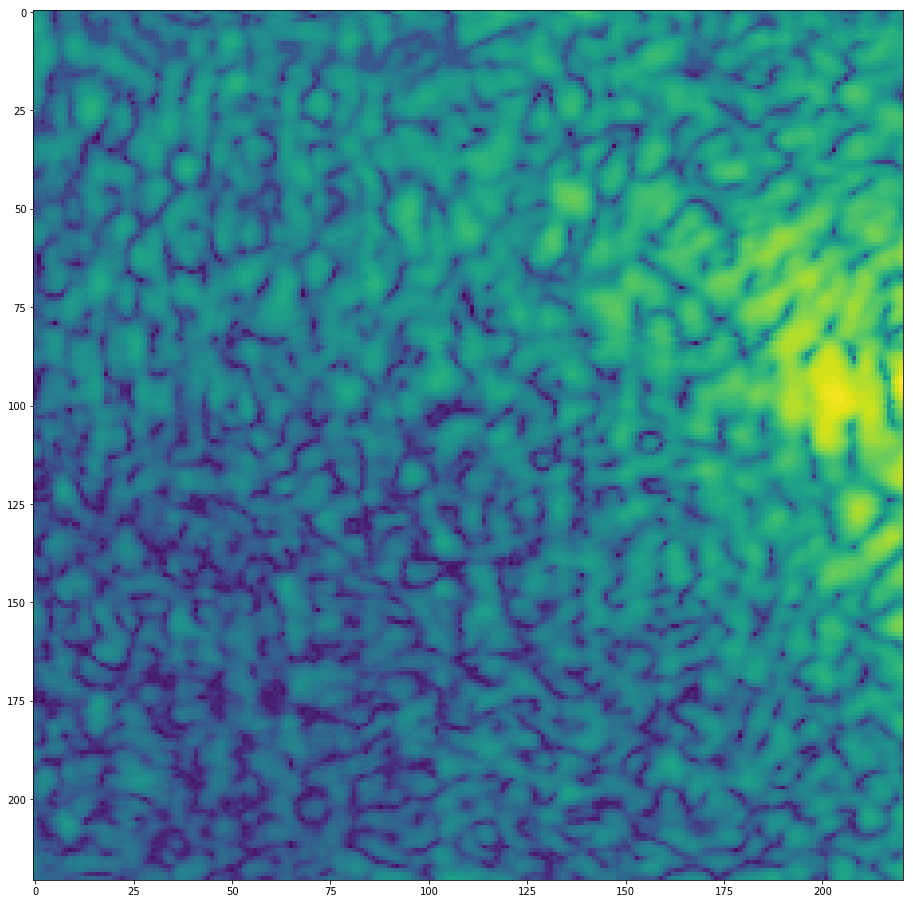

In [4]:
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (221, 221)), cmap='viridis')
# This is with frequency 27.5 kHZ
plt.show()

In [17]:
ampdata = compile_data_to_array('../data/1550623280', sample_start=99, sample_end=100)

Found 221 records
Median number of records in continguous strip: 499.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


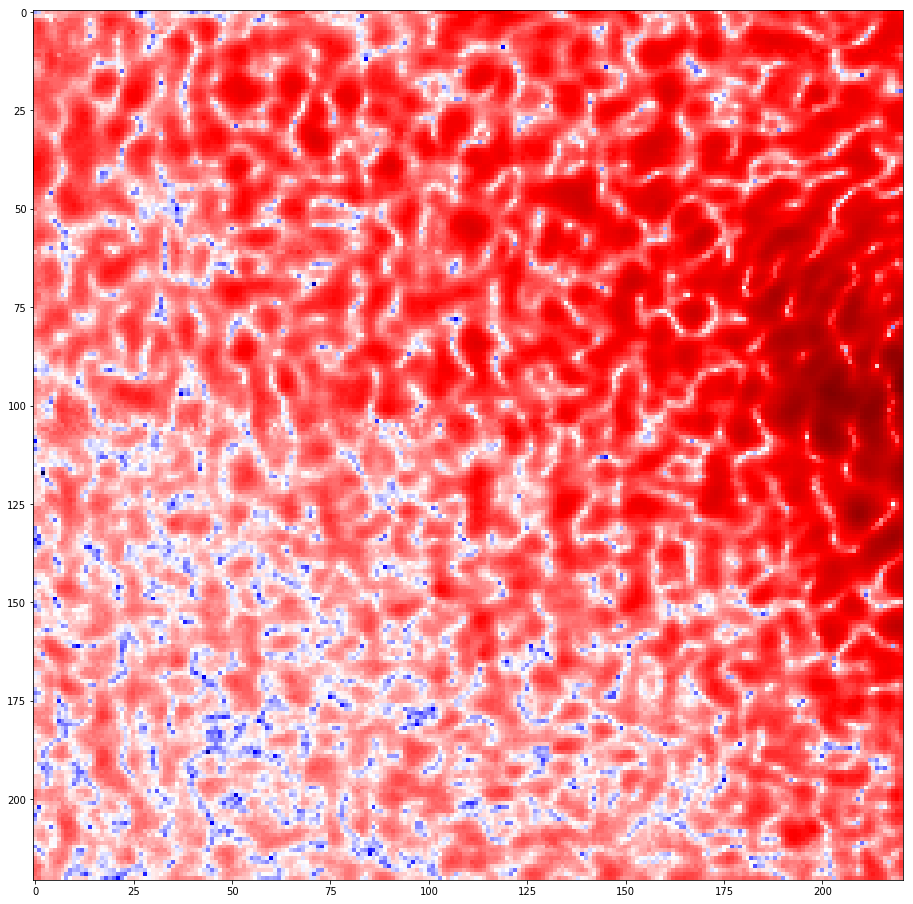

In [26]:
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (221, 221)), cmap='seismic')
plt.show()

#27800 Hz

Found 221 records
Median number of records in continguous strip: 183.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


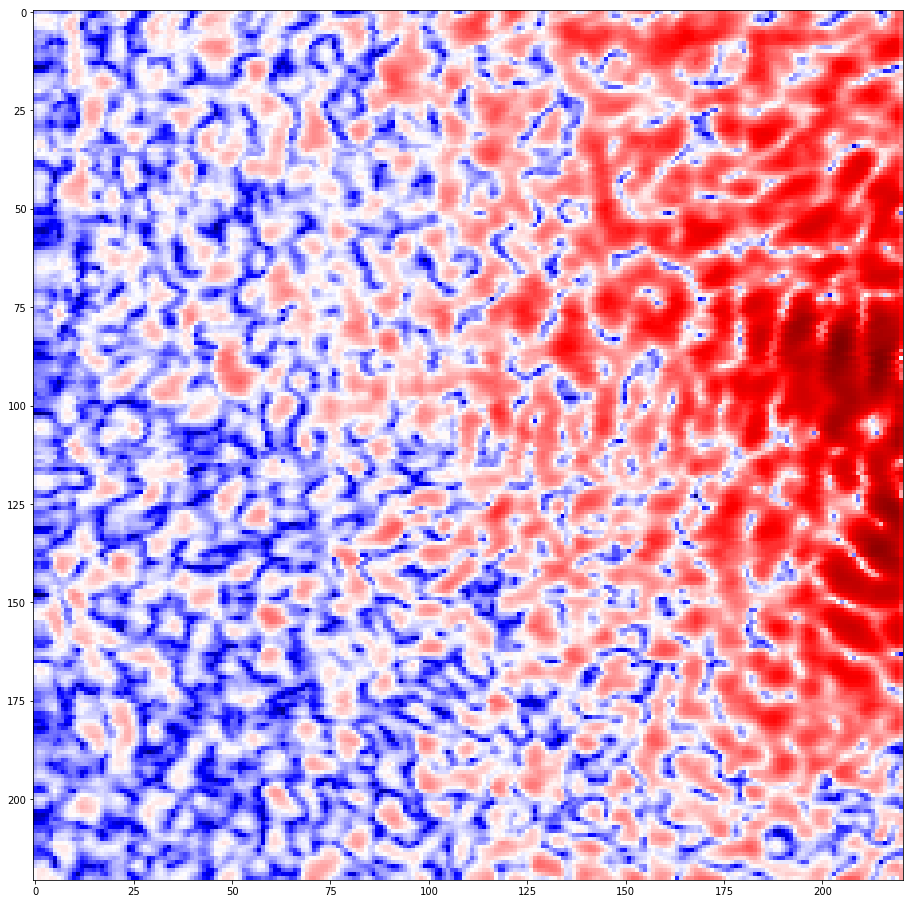

In [28]:
ampdata = compile_data_to_array('../data/1550683856', sample_start=0, sample_end=50)
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (221, 221)), cmap='seismic')
plt.show()

Found 221 records
Median number of records in continguous strip: 183.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


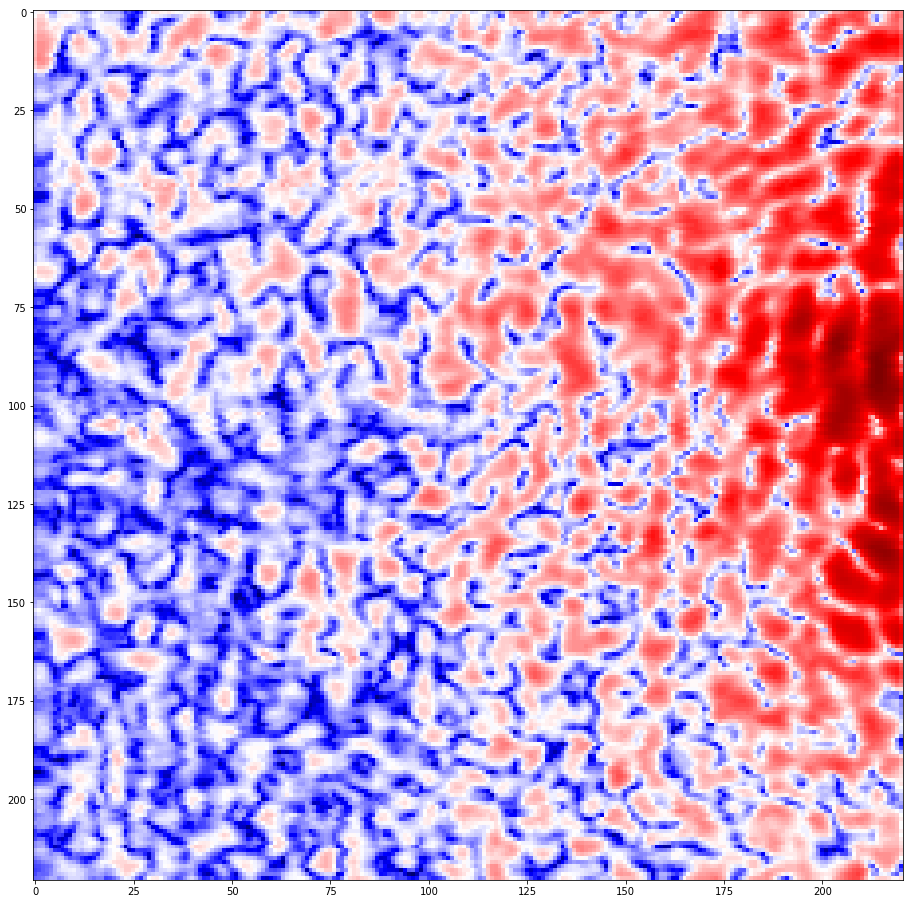

In [29]:
ampdata = compile_data_to_array('../data/1550699595', sample_start=0, sample_end=50)
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (221, 221)), cmap='seismic')
plt.show()

Found 221 records
Median number of records in continguous strip: 183.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


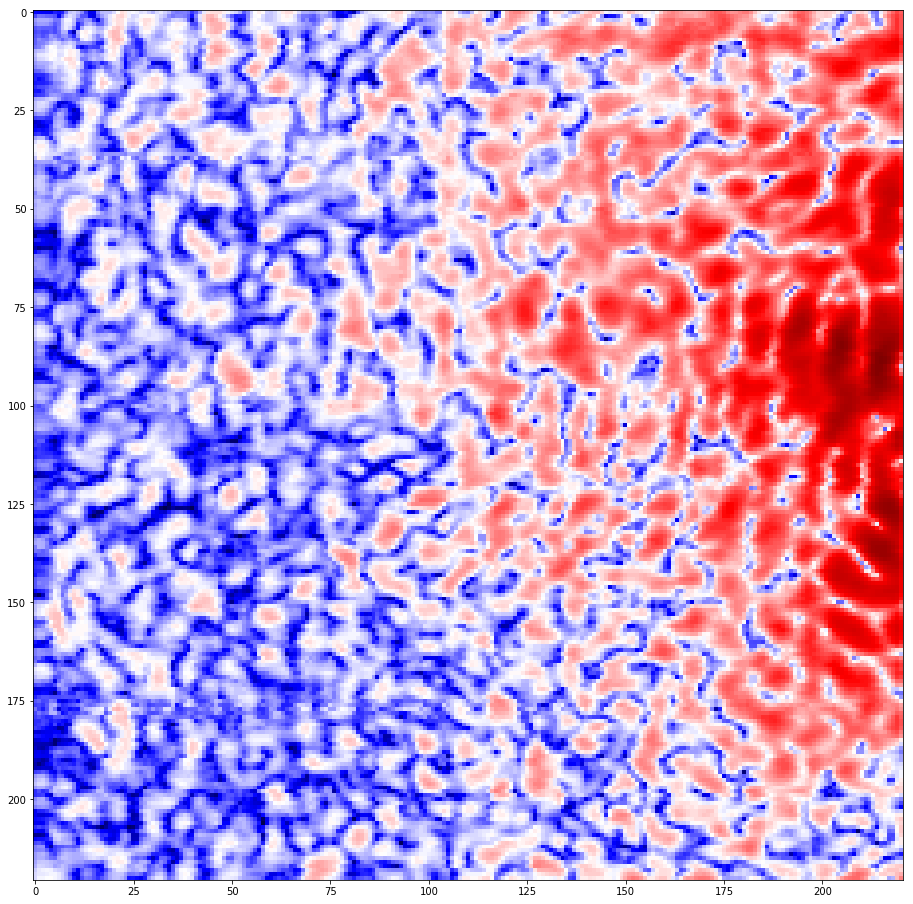

In [30]:
ampdata = compile_data_to_array('../data/1550779619', sample_start=0, sample_end=50)
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (221, 221)), cmap='seismic')
plt.show()

Found 221 records
Median number of records in continguous strip: 183.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


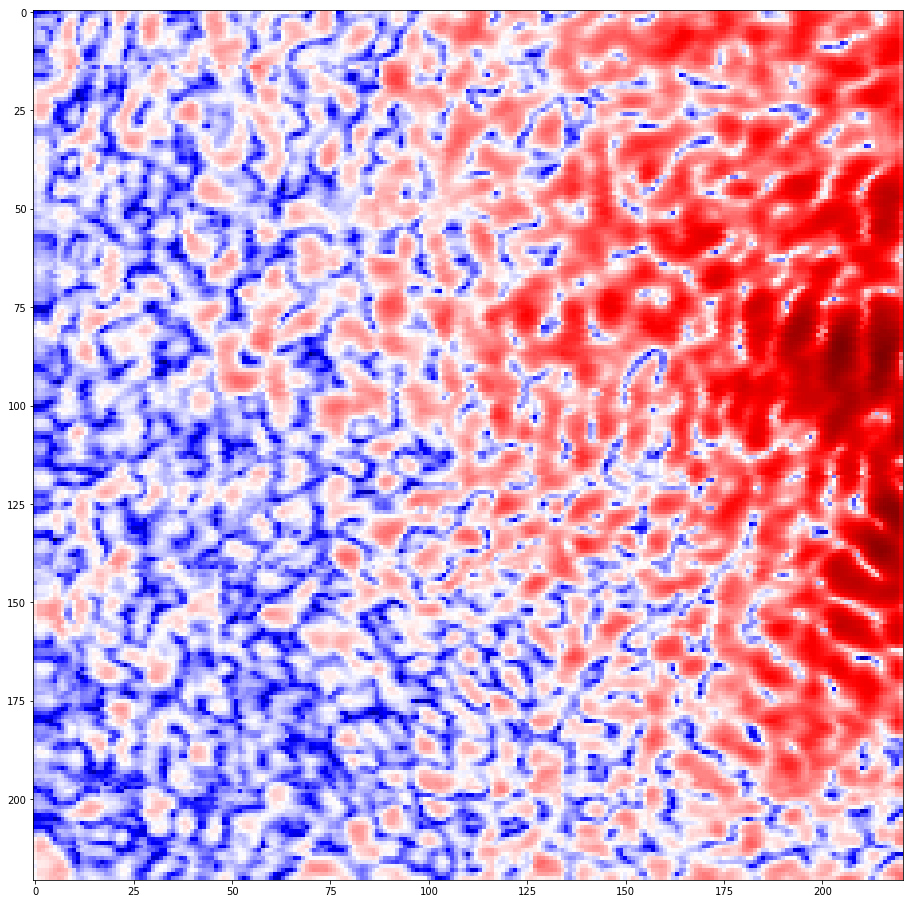

In [31]:
ampdata = compile_data_to_array('../data/1550790738', sample_start=0, sample_end=50)
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (221, 221)), cmap='seismic')
plt.show()

Found 221 records
Median number of records in continguous strip: 183.0


/home/metamaterials/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


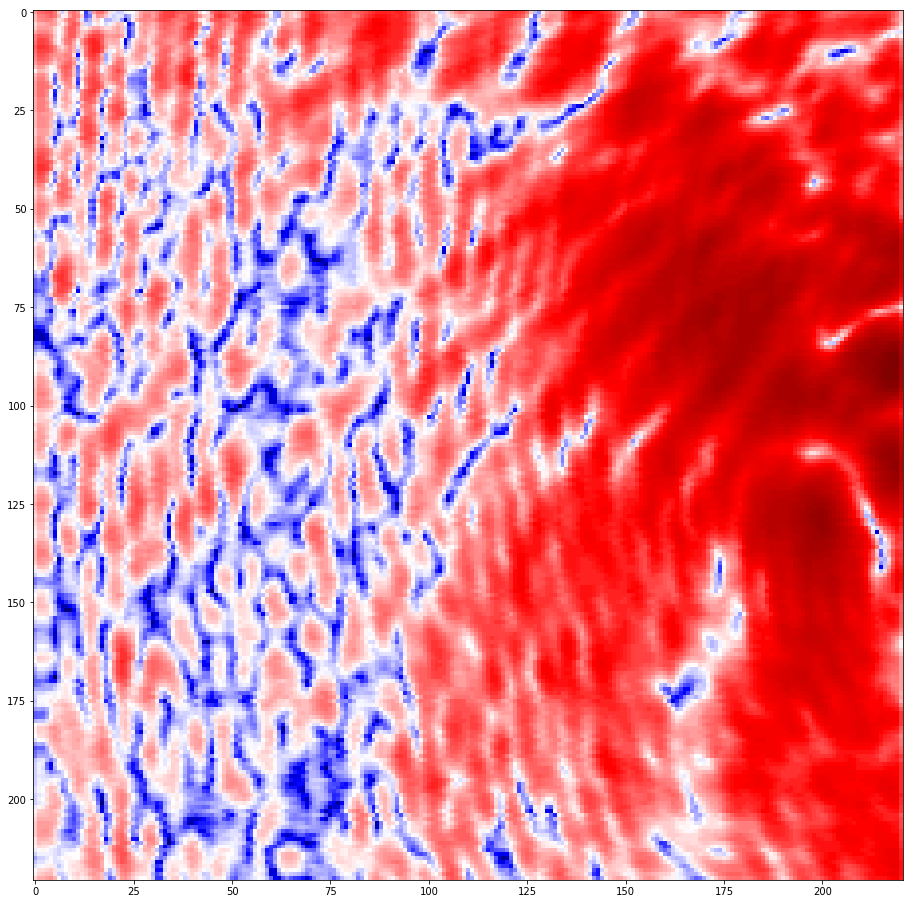

In [33]:
ampdata = compile_data_to_array('../data/1550802033', sample_start=0, sample_end=50)
plt.figure(figsize=(16, 16)) 
plt.imshow(skimage.transform.resize(ampdata, (221, 221)), cmap='seismic')
plt.show()